In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import sparse,  io, linalg
import pickle
from tqdm import tqdm_notebook as tqdm
import networkx as nx
import snap
from utils import *
import utils
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
college_messages = np.loadtxt('../CollegeMsg.txt',dtype=int)
# converting edge weight information into graph
G = nx.Graph()
for i in tqdm(range(college_messages.shape[0])):
    if G.has_edge(college_messages[i,0],college_messages[i,1]):
        G[college_messages[i,0]][college_messages[i,1]]['weight']+=1
    else:
        G.add_edge(college_messages[i,0],college_messages[i,1],weight=1)
for e in tqdm(G.edges()):
    G[e[0]][e[1]]['weight_inv']=1/float(G[e[0]][e[1]]['weight'])
    G[e[0]][e[1]]['weight_inv_exp']=np.exp(-float(G[e[0]][e[1]]['weight'])/3.0)

        

<IPython.core.display.Javascript object>


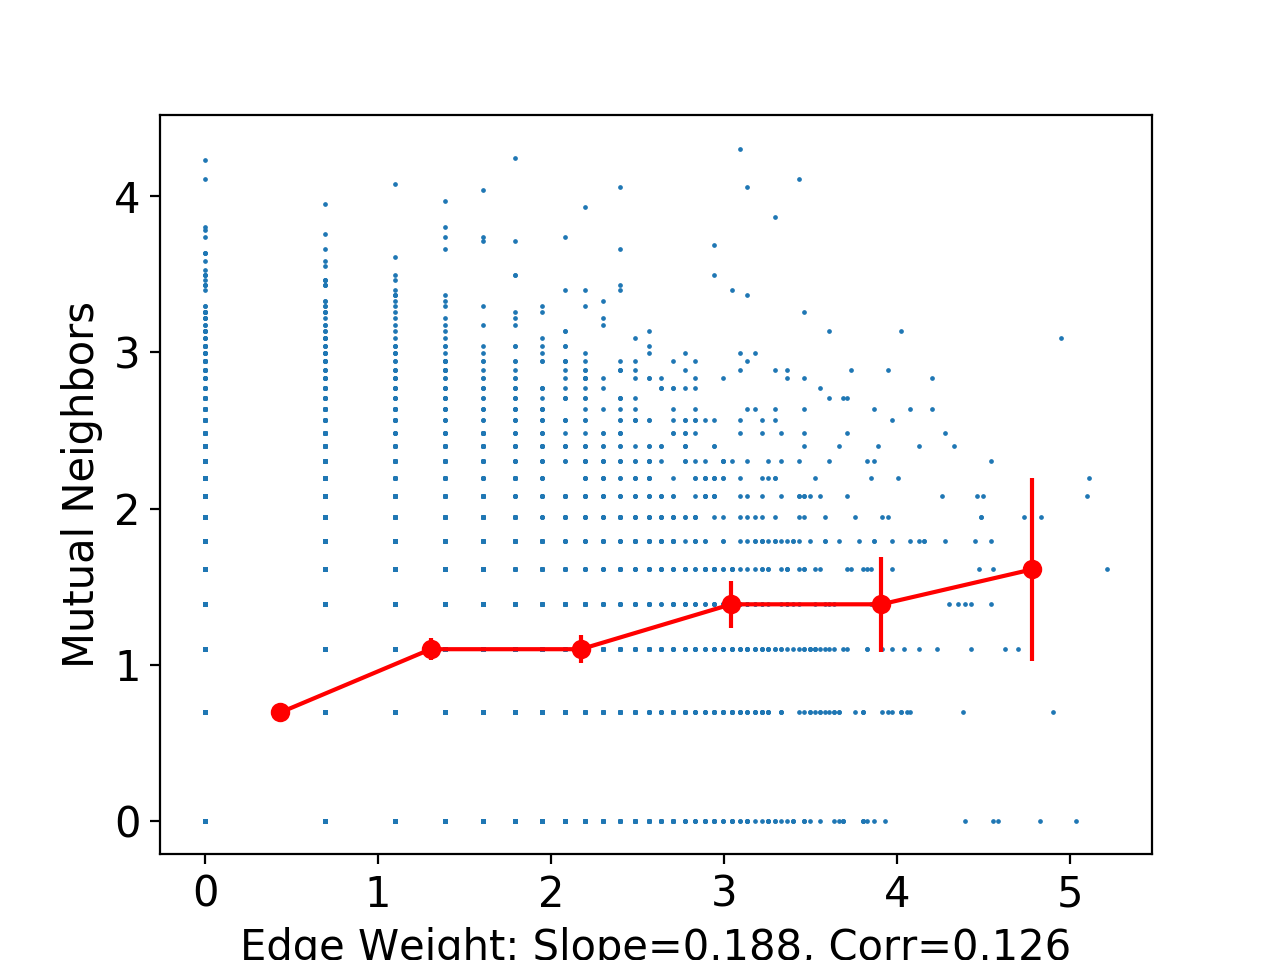

In [6]:
pwl=mutual(G)
plot_log_log_summary(pwl,"Edge Weight", "Mutual Neighbors", B=6,summary=np.median)

<IPython.core.display.Javascript object>


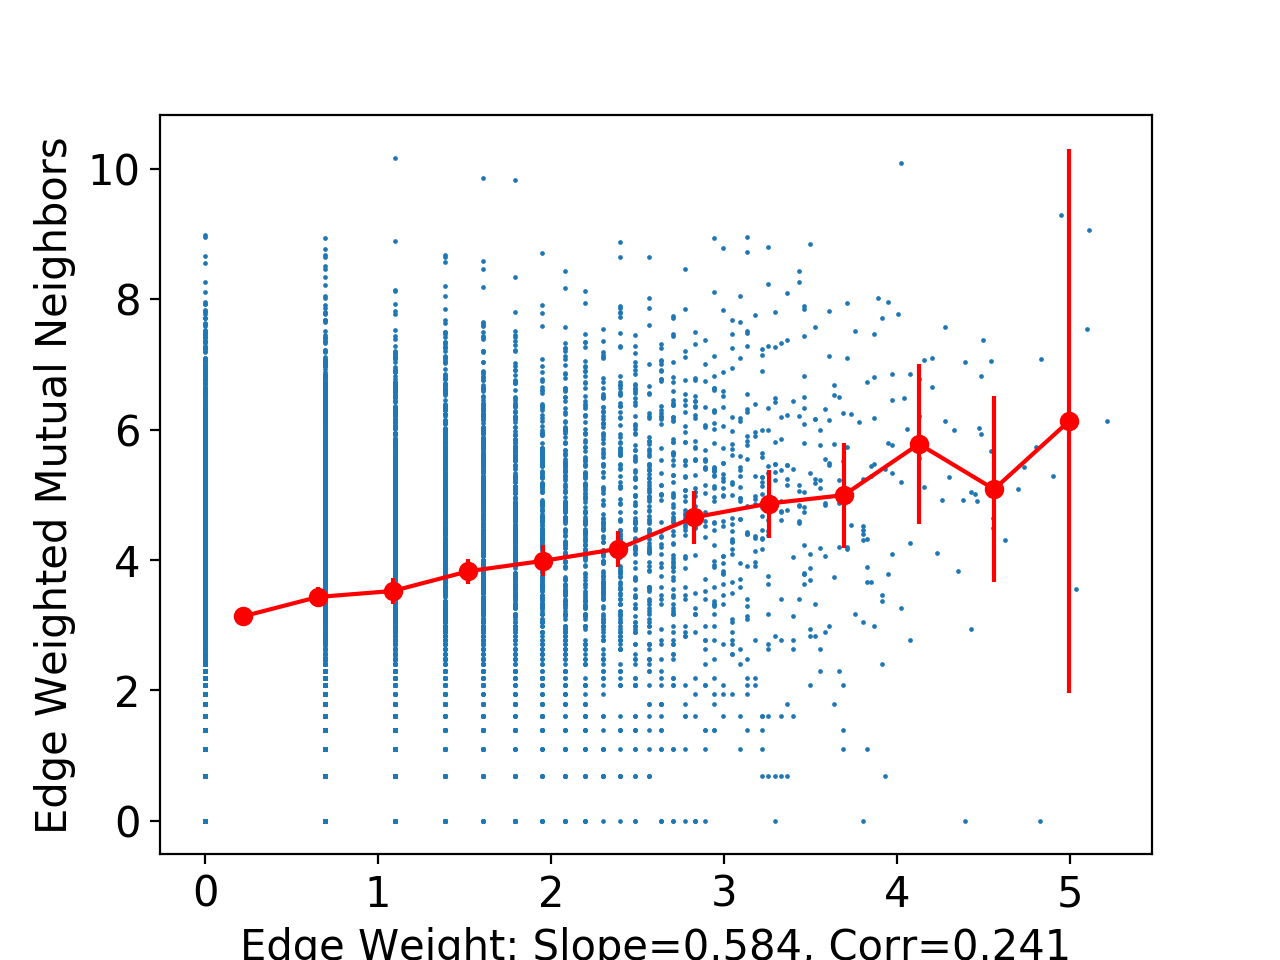

In [7]:
#pwl=sim_score_1(G)
pwl=mutual_ew(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Mutual Neighbors", B=12,summary=np.median)

<IPython.core.display.Javascript object>


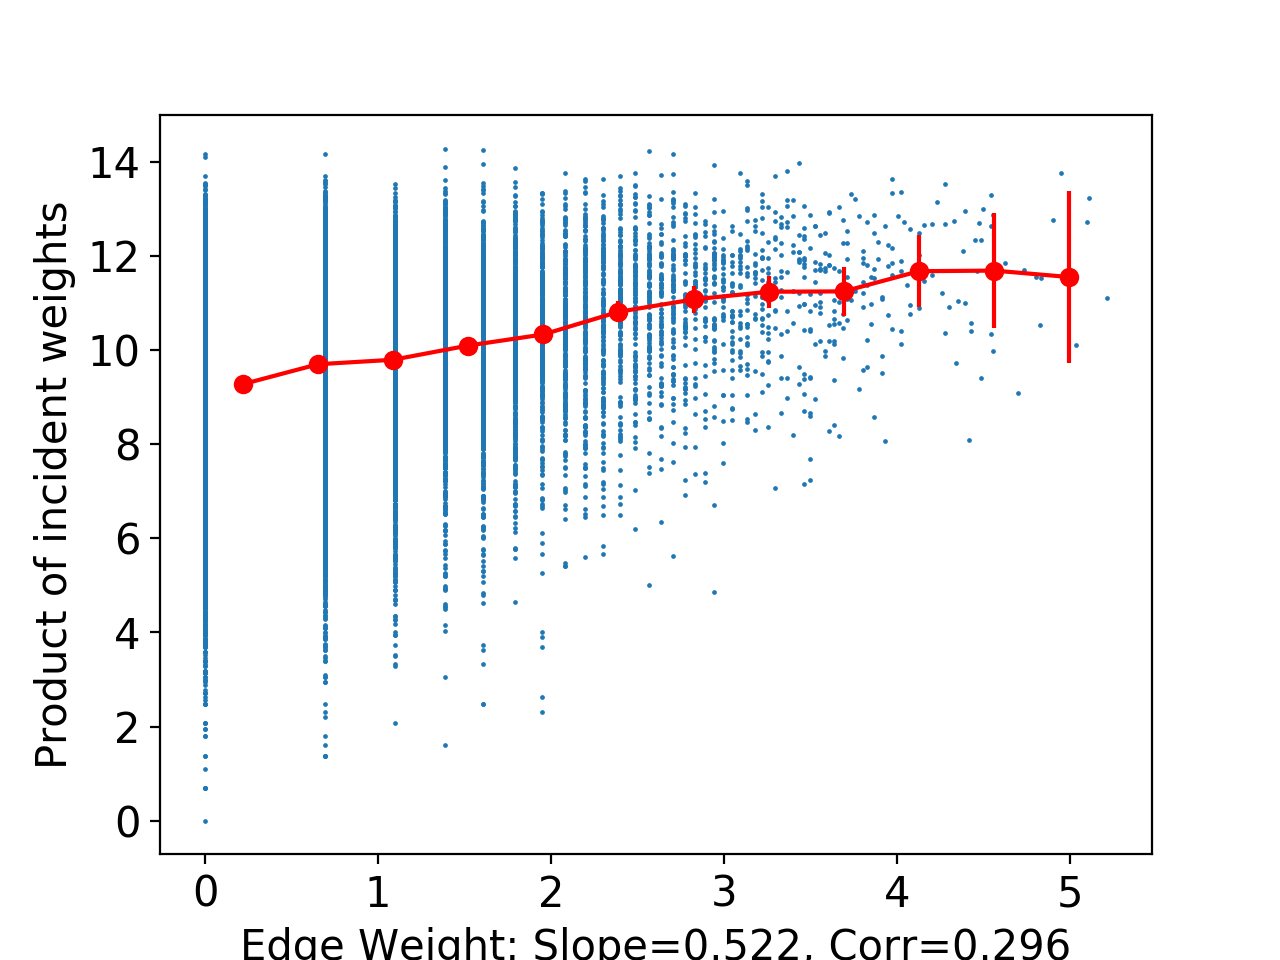

In [8]:
#pwl=sim_score_1(oregon_G)
pwl=ewpl(G)
plot_log_log_summary(pwl,"Edge Weight", "Product of incident weights", summary=np.median,B=12)

<IPython.core.display.Javascript object>


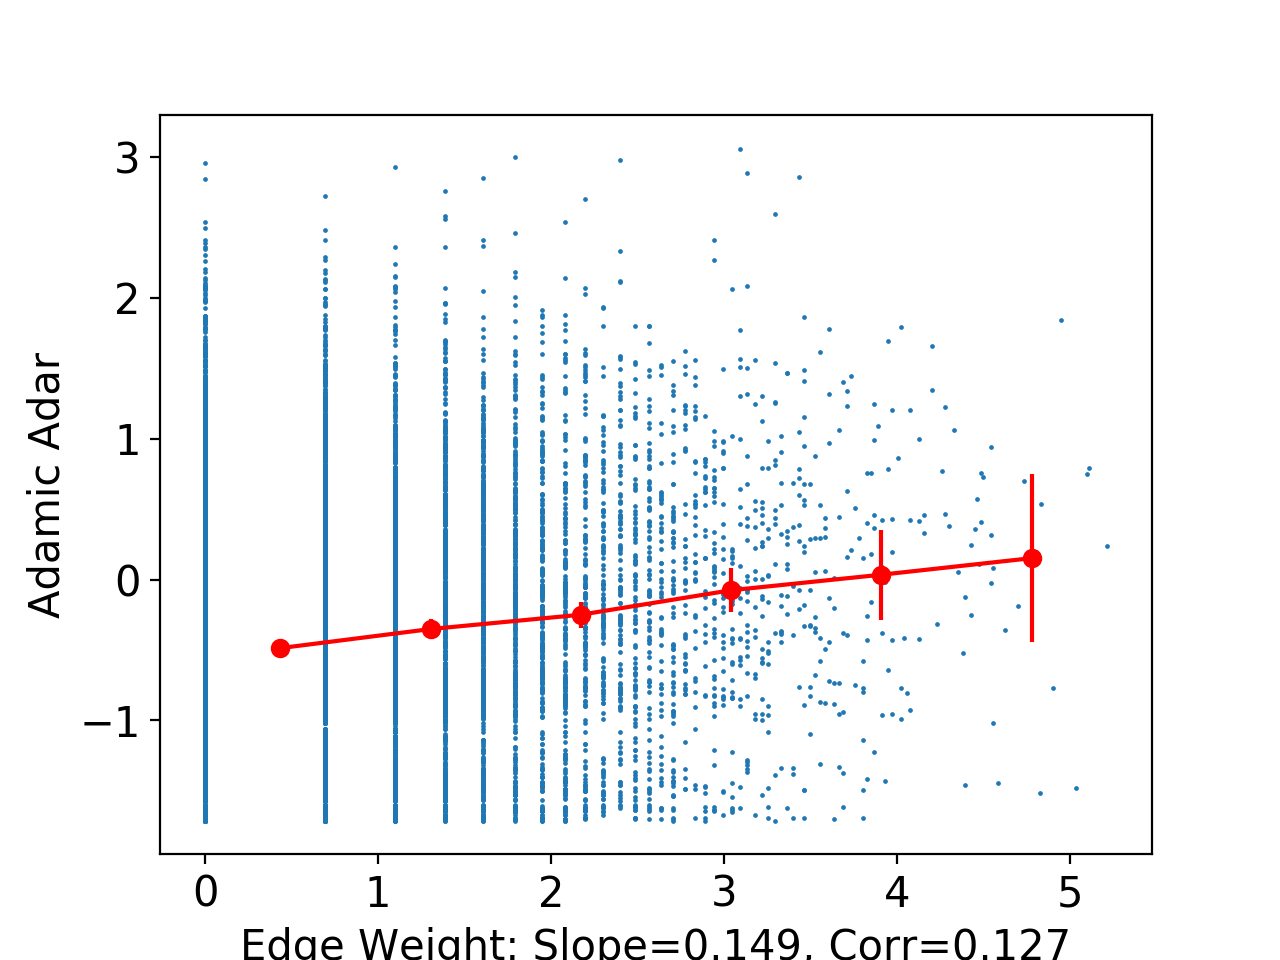

In [9]:
pwl=adamic_acar(G)
plot_log_log_summary(pwl,"Edge Weight", "Adamic Adar")

<IPython.core.display.Javascript object>


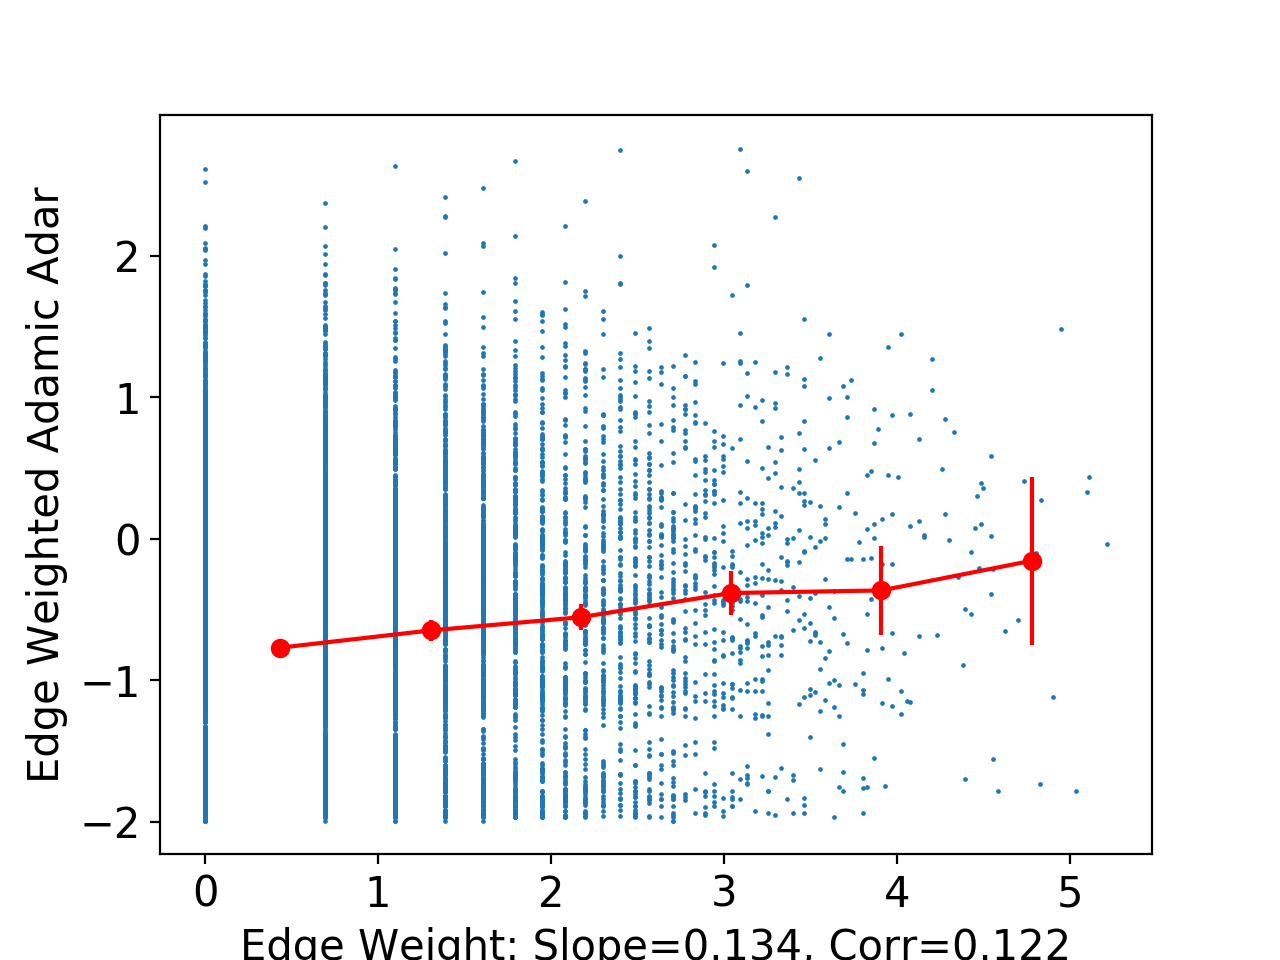

In [10]:
pwl=adamic_acar_ew(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Adamic Adar")

<IPython.core.display.Javascript object>


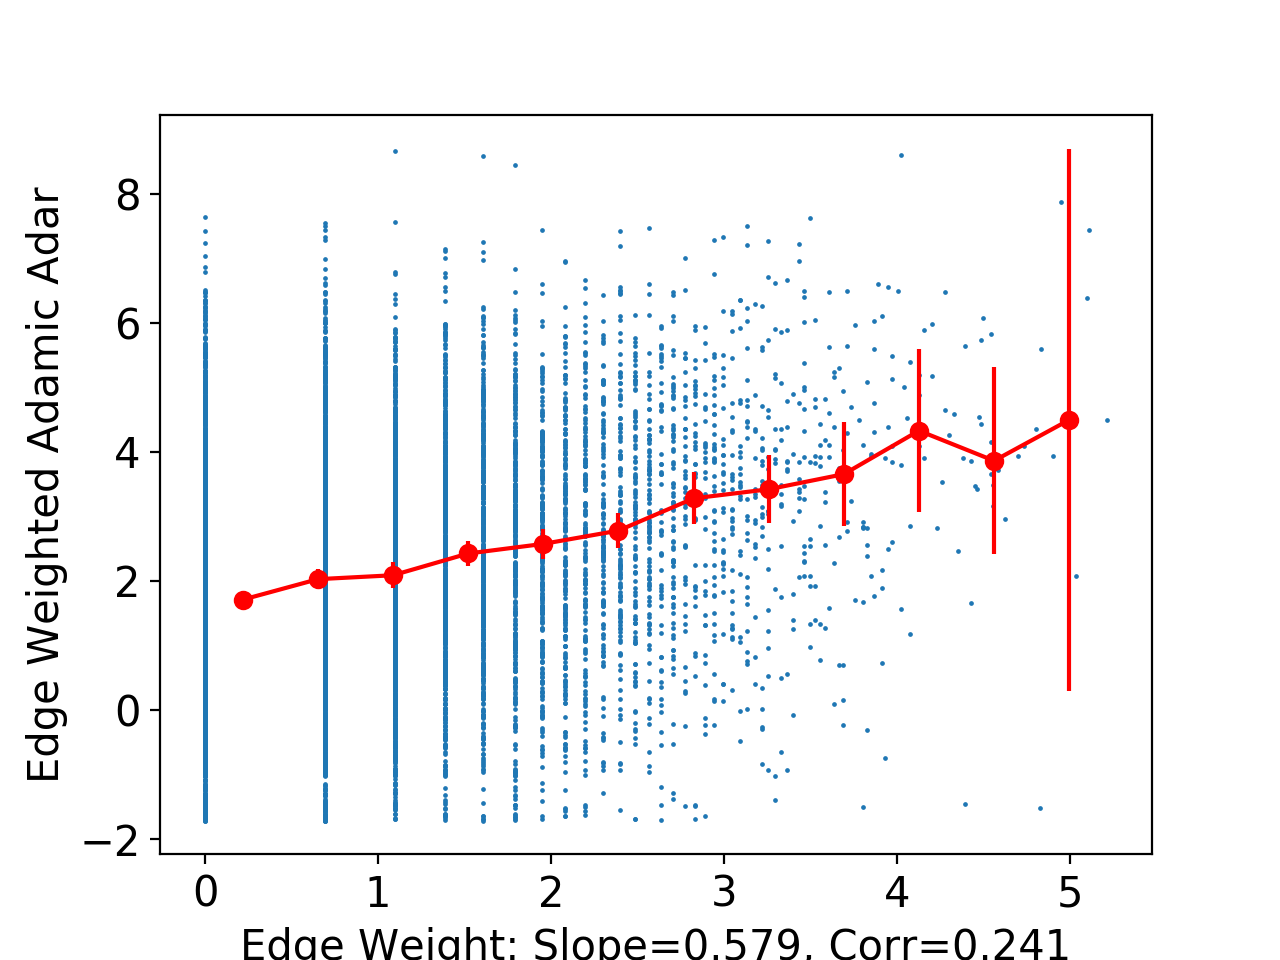

In [11]:
pwl=adamic_acar_ew_2(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Adamic Adar",B=12)

<IPython.core.display.Javascript object>


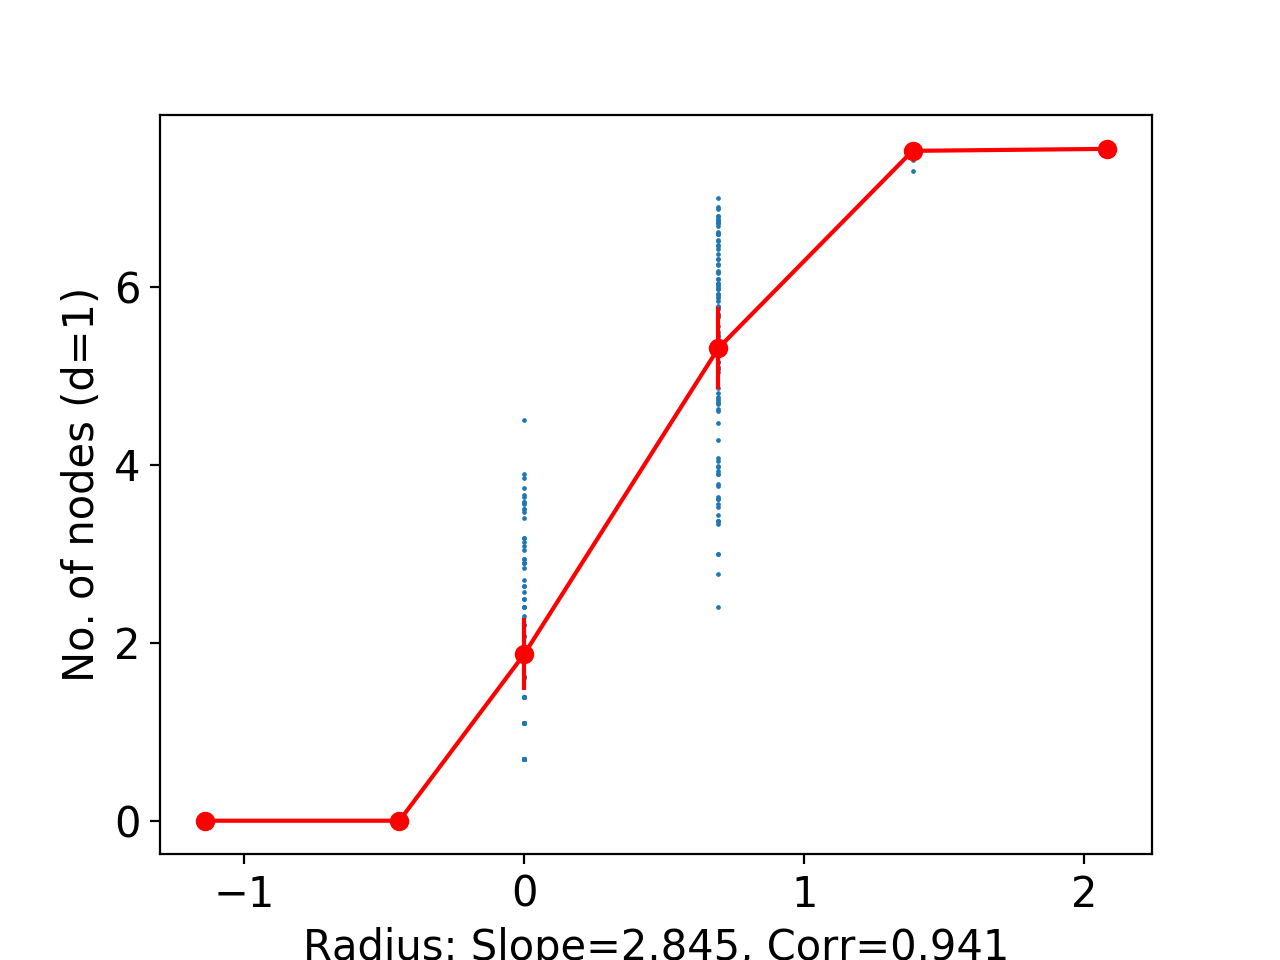

/Users/vaishnan/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1903: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
/Users/vaishnan/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


In [12]:
distances=[0.32,0.64,1.0,2.0,4.0,8.0]
pwl = self_similarity(G,distances,size=100)
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=1)",discrete=True,summary=np.mean)

<IPython.core.display.Javascript object>


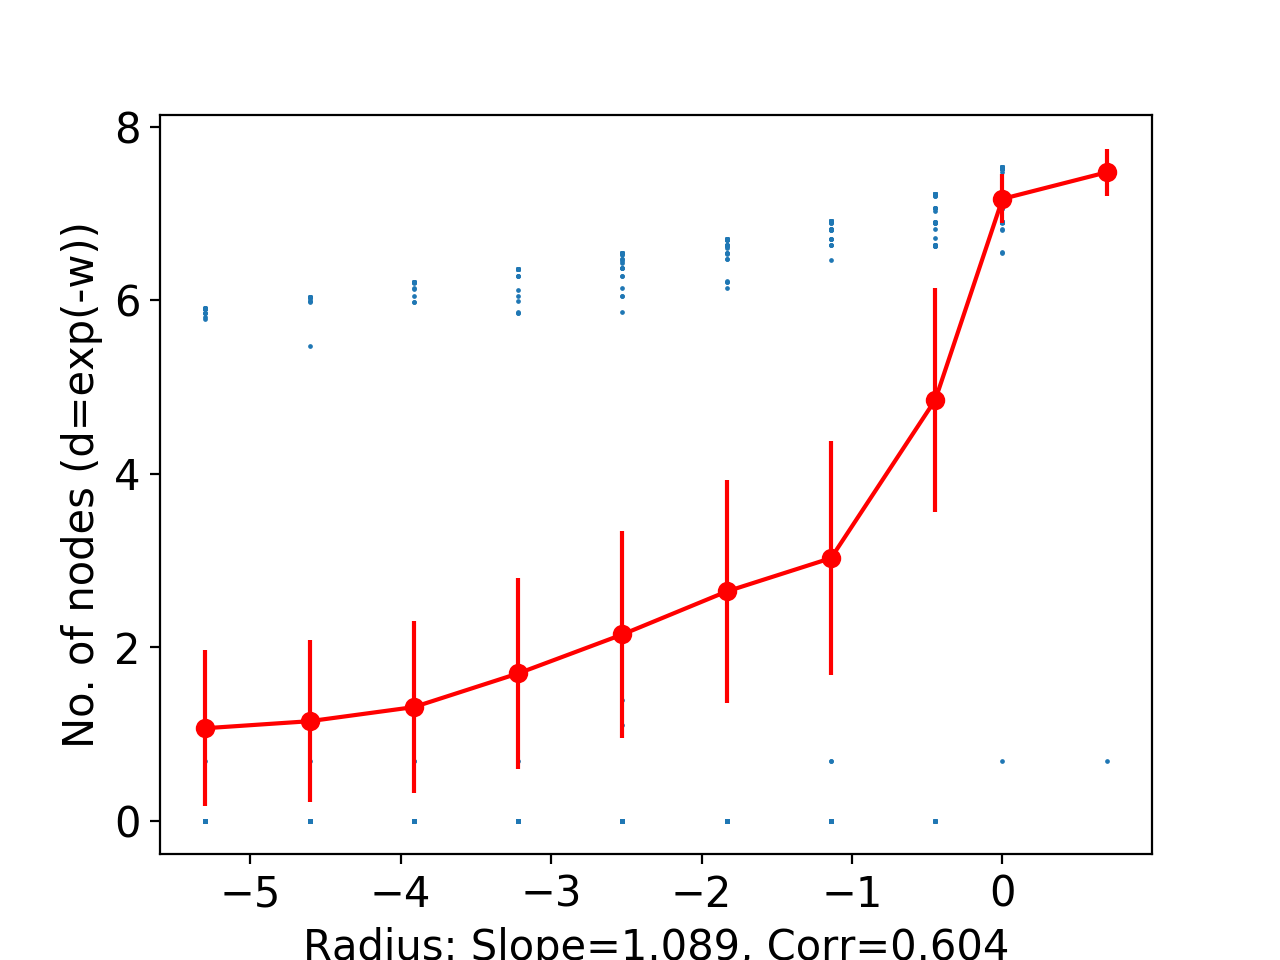

In [13]:
distances=[0.005,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.0,2.0]
pwl = self_similarity(G,distances,size=100,weight='weight_inv_exp')
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=exp(-w))",discrete=True,summary=np.mean)

<IPython.core.display.Javascript object>


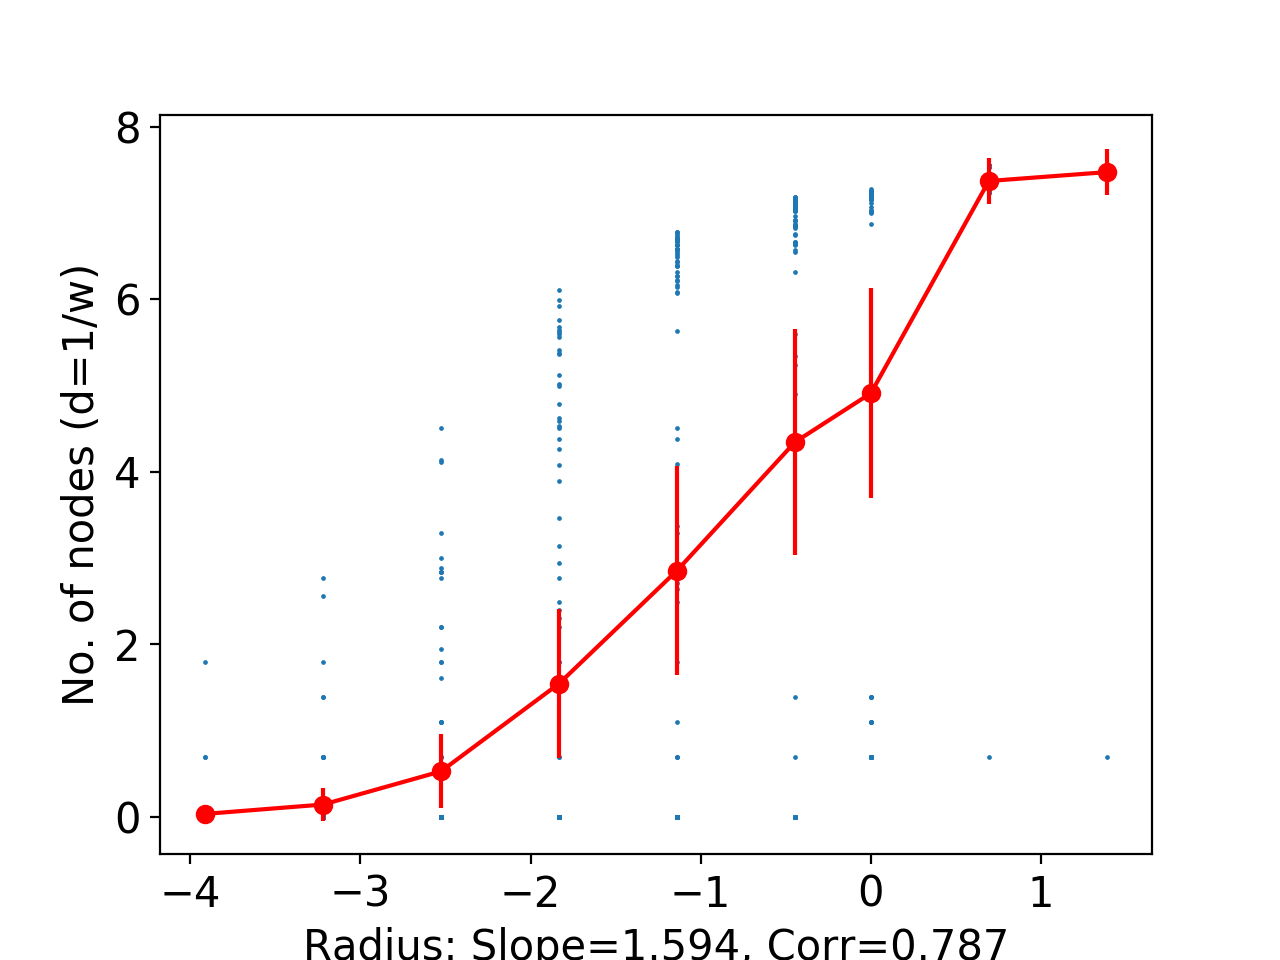

In [17]:
distances=[0.02,0.04,0.08,0.16,0.32,0.64,1.0,2.0,4.0]
pwl = self_similarity(G,distances,size=100,weight='weight_inv')
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=1/w)",discrete=True,summary=np.mean)